In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
to_graph = {'batch_size': [8, 16, 32, 64, 128],
            'test_r': [0.64969, 0.63575, 0.64723, 0.6399, 0.64428],
            'test_mae': [0.5879, 0.5953, 0.59186, 0.59329, 0.621],
            'validation_r': [.64004, .64515, .65426, .64423, .65938]
            }
df = pd.DataFrame(to_graph)

In [3]:
df

,batch_size,test_r,test_mae,validation_r
0,8,0.64969,0.58790,0.64004
1,16,0.63575,0.59530,0.64515
2,32,0.64723,0.59186,0.65426
3,64,0.63990,0.59329,0.64423
4,128,0.64428,0.62100,0.65938


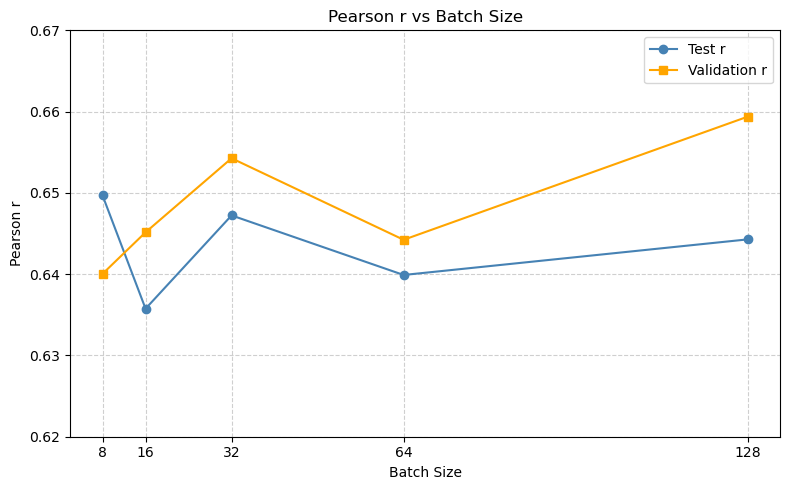

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(to_graph['batch_size'], to_graph['test_r'], marker='o', linestyle='-', color='steelblue', label='Test r')
plt.plot(to_graph['batch_size'], to_graph['validation_r'], marker='s', linestyle='-', color='orange', label='Validation r')

plt.title("Pearson r vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Pearson r")
plt.xticks(to_graph['batch_size'])
plt.ylim(0.62, 0.67)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()